<a href="https://colab.research.google.com/github/Sai25Hajime/CognifyZTech_Level1_Task3/blob/main/CognifyZTech_Level1_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the Google Drive

First we mount the google drive since that is where the dataset will be stored.

In [30]:
#Both are used to import the drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installing Folium

We are installing folium since the locations of the restaurants will be rendered on a map.

In [31]:
!pip install folium geopandas plotly

# Importing Libraries

Importing libraries is standard practice when coding or working with datasets. In this case we are importing the Pandas, MatPlotlib and Seaborn libraries. We are also importing the display libraties.

In [32]:
# Import required libraries
import pandas as pd
import folium
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Loading the Dataset

Now we load the dataset. Since we have uploaded it from Google Drive. We need to put that path instead of the local path.

In [33]:
# Load the dataset
file_path = "/content/drive/MyDrive/Datasets/cognifyz_dataset.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Displaying Few Rows

First we will display few rows to get an idea of the dataset.

In [34]:
# Display the first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Dropping Missing Values

If there are any missing calues of longitude and latitude, we will drop those values.

In [35]:
# Drop rows with missing latitude or longitude values
df = df.dropna(subset=['Latitude', 'Longitude'])

# Visualizing the Restaurants

We create a map to visualize our results. It is saved as an HTML File.

In [36]:
### 1. Visualizing Restaurants on a Map ###
# Creating a map centered at the mean latitude & longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=5)

# Adding restaurant markers to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['City']}, {row['Country Code']} - Rating: {row['Aggregate rating']}",
        icon=folium.Icon(color="blue", icon="cutlery", prefix="fa")
    ).add_to(restaurant_map)

# Save and display the map
restaurant_map.save("/content/drive/MyDrive/Datasets/restaurant_map.html")

# Distribution of Restaurants

The distribution of restaurants is shown in the plot given below.

<ipython-input-37-bd0be9bc01bb>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




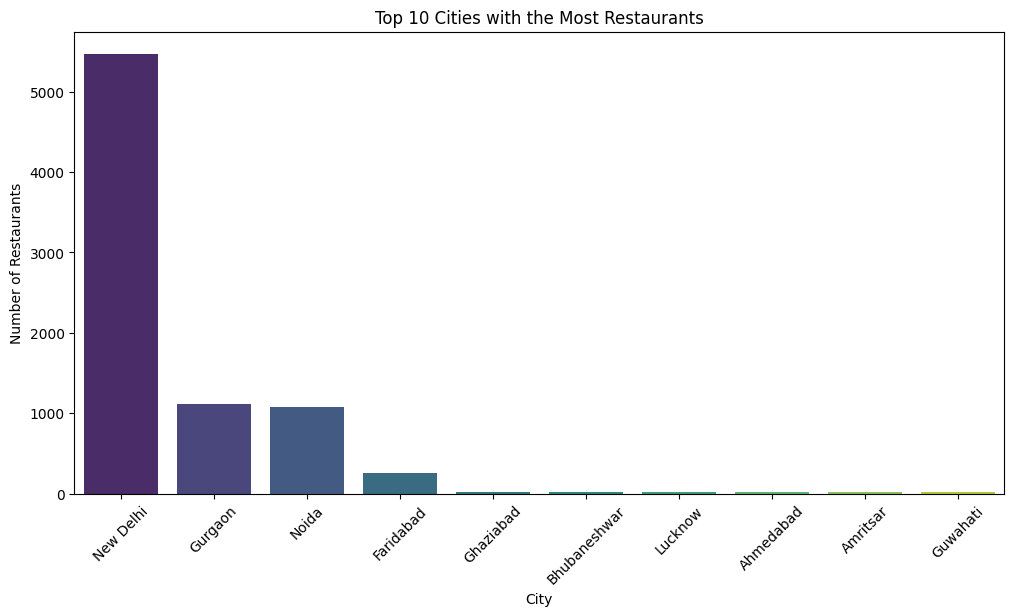

In [37]:
### 2. Distribution of Restaurants by City ###
plt.figure(figsize=(12, 6))
top_cities = df['City'].value_counts().nlargest(10)  # Top 10 cities with the most restaurants
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.title("Top 10 Cities with the Most Restaurants")
plt.show()

# Correlation Between Location and Rating using Scatterplot

Here we have done the correlation between location and restaurants using Scatterplot.

In [38]:
### 3. Correlation Between Location & Rating ###
# Scatter plot of ratings vs latitude & longitude
fig = px.scatter(df, x="Longitude", y="Latitude", color="Aggregate rating",
                 size="Aggregate rating", hover_data=['City', 'Country Code'],
                 title="Restaurant Locations Colored by Rating")

fig.show()

# Correlation of Variables using HeatMap

We are checking the correlation of latitude, longitude and the rating by using the correlation matrix which gets rendered on a heatmap.

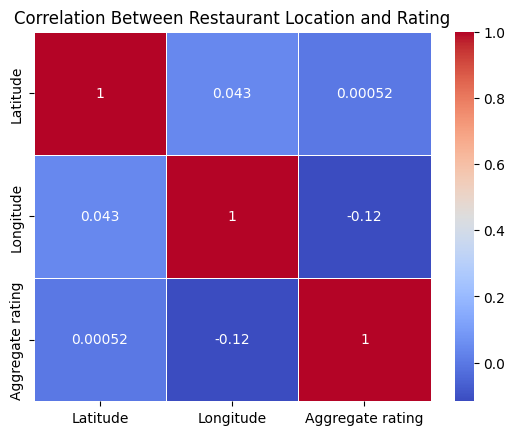

In [39]:
# Checking correlation between latitude, longitude, and rating
correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Restaurant Location and Rating")
plt.show()